###The goal of this analysis is to explore the Titanic dataset and identify key factors affecting passenger survival.

In [103]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [104]:
df = pd.read_csv(r"C:\Users\Administrator\Downloads\archive (3)\train.csv")

In [105]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [107]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [108]:
df.drop(['Ticket','Cabin','Name'],inplace = True,axis = 1) 

###Categorical variables were converted into numerical values to enable correlation analysis and machine learning models.

In [109]:
df ['Sex'] = df['Sex'].map({'male' : 0 , 'female' : 1}) 

In [110]:
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)


In [111]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,1,0,3,0,22.0,1,0,7.2500,False,True
1,2,1,1,1,38.0,1,0,71.2833,False,False
2,3,1,3,1,26.0,0,0,7.9250,False,True
3,4,1,1,1,35.0,1,0,53.1000,False,True
4,5,0,3,0,35.0,0,0,8.0500,False,True


In [112]:
### fill the missing age values with the age mean 
meanage = df['Age'].mean()
meanage

29.69911764705882

In [113]:
 df['Age'].fillna(meanage,inplace = True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_12768\2147643646.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(meanage,inplace = True)


In [114]:
### check the all values are not null
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked_Q   891 non-null    bool   
 9   Embarked_S   891 non-null    bool   
dtypes: bool(2), float64(2), int64(6)
memory usage: 57.6 KB


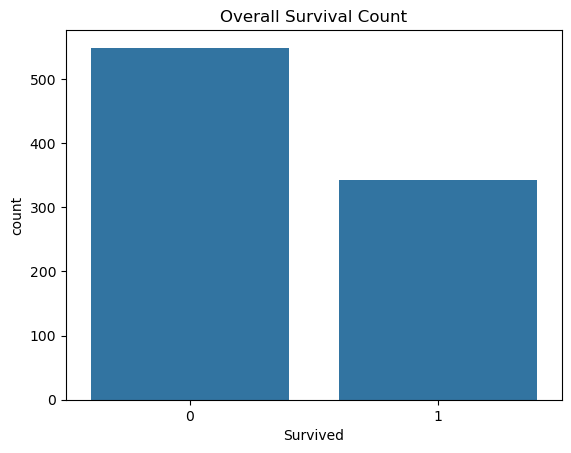

In [115]:
sns.countplot(x='Survived',data = df)
plt.title('Overall Survival Count')
plt.show()

In [116]:
###More passengers did not survive than those who survived

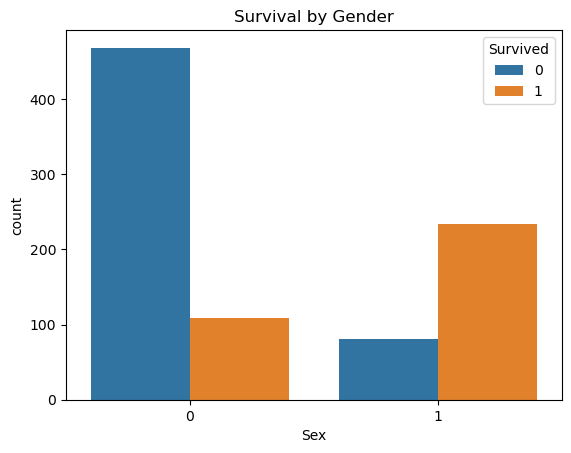

In [117]:
sns.countplot(x= 'Sex',hue= 'Survived', data = df)
plt.title('Survival by Gender')
plt.show()

In [118]:
###Females had a significantly higher survival rate compared to males.

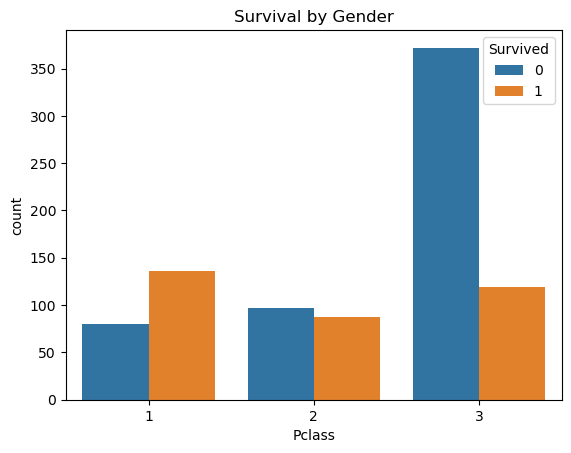

In [119]:
sns.countplot(x= 'Pclass',hue= 'Survived', data = df)
plt.title('Survival by Gender')
plt.show()

In [120]:
###Passengers in higher classes had better survival chances

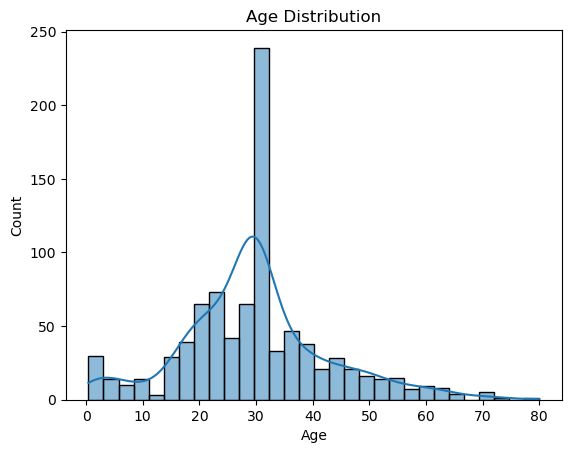

In [121]:
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

In [122]:
###Most passengers were between 20 and 40 years old

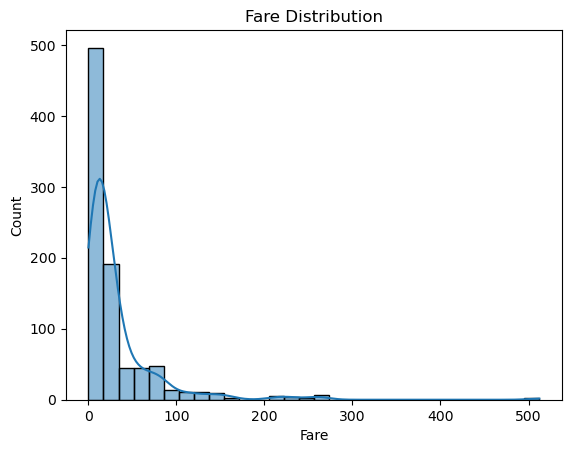

In [123]:
sns.histplot(df['Fare'], bins=30, kde=True)
plt.title('Fare Distribution')
plt.show()


In [124]:
###Fare prices were right-skewed, indicating a few passengers paid much higher fares.

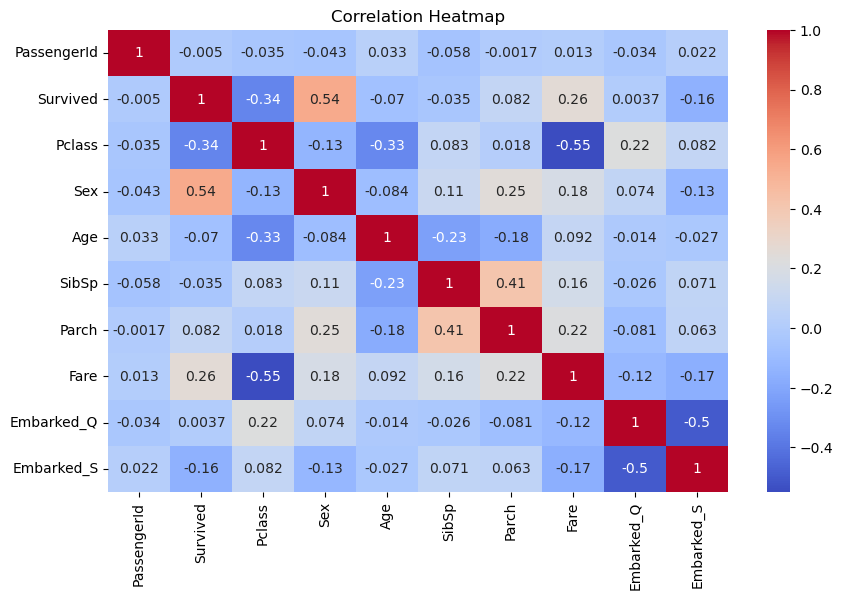

In [125]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [126]:
### the three main factors effect the survival are sex , pclass and fare 
# female are survived more 
# higher classes survived more due to thier better place 
# when the fare is higher the taken place are more comfort and save 

In [127]:
### Conclusions
#Gender was the strongest factor affecting survival.

#Higher-class passengers had better chances of survival.

#Younger passengers survived more than older ones.

#Fare is positively correlated with survival.

#Social and economic status played a key role

In [128]:
### Recommendation to survived 
# 1) buy high fare ticket 
# 2) reserve higher class 